# ML4E Final Proyect - Model Testing

Moira Patricia Clavin

Pedro Straface

Maria Catalina Avaca

Santiago Viola

In [271]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score
from sklearn.linear_model import LogisticRegressionCV
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, ConfusionMatrixDisplay

In [272]:
df = pd.read_csv('/content/loan_approval_dataset (1).csv')

In [273]:
df.head(10)

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected
5,6,0,Graduate,Yes,4800000,13500000,10,319,6800000,8300000,13700000,5100000,Rejected
6,7,5,Graduate,No,8700000,33000000,4,678,22500000,14800000,29200000,4300000,Approved
7,8,2,Graduate,Yes,5700000,15000000,20,382,13200000,5700000,11800000,6000000,Rejected
8,9,0,Graduate,Yes,800000,2200000,20,782,1300000,800000,2800000,600000,Approved
9,10,5,Not Graduate,No,1100000,4300000,10,388,3200000,1400000,3300000,1600000,Rejected


In [274]:
df.describe()

,loan_id,no_of_dependents,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value
count,4269.000000,4269.000000,4.269000e+03,4.269000e+03,4269.000000,4269.000000,4.269000e+03,4.269000e+03,4.269000e+03,4.269000e+03
mean,2135.000000,2.498712,5.059124e+06,1.513345e+07,10.900445,599.936051,7.472617e+06,4.973155e+06,1.512631e+07,4.976692e+06
std,1232.498479,1.695910,2.806840e+06,9.043363e+06,5.709187,172.430401,6.503637e+06,4.388966e+06,9.103754e+06,3.250185e+06
min,1.000000,0.000000,2.000000e+05,3.000000e+05,2.000000,300.000000,-1.000000e+05,0.000000e+00,3.000000e+05,0.000000e+00
25%,1068.000000,1.000000,2.700000e+06,7.700000e+06,6.000000,453.000000,2.200000e+06,1.300000e+06,7.500000e+06,2.300000e+06
50%,2135.000000,3.000000,5.100000e+06,1.450000e+07,10.000000,600.000000,5.600000e+06,3.700000e+06,1.460000e+07,4.600000e+06
75%,3202.000000,4.000000,7.500000e+06,2.150000e+07,16.000000,748.000000,1.130000e+07,7.600000e+06,2.170000e+07,7.100000e+06
max,4269.000000,5.000000,9.900000e+06,3.950000e+07,20.000000,900.000000,2.910000e+07,1.940000e+07,3.920000e+07,1.470000e+07


In [275]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4269 entries, 0 to 4268
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   loan_id                    4269 non-null   int64 
 1    no_of_dependents          4269 non-null   int64 
 2    education                 4269 non-null   object
 3    self_employed             4269 non-null   object
 4    income_annum              4269 non-null   int64 
 5    loan_amount               4269 non-null   int64 
 6    loan_term                 4269 non-null   int64 
 7    cibil_score               4269 non-null   int64 
 8    residential_assets_value  4269 non-null   int64 
 9    commercial_assets_value   4269 non-null   int64 
 10   luxury_assets_value       4269 non-null   int64 
 11   bank_asset_value          4269 non-null   int64 
 12   loan_status               4269 non-null   object
dtypes: int64(10), object(3)
memory usage: 433.7+ KB


In [276]:
df[' cibil_score'].min()

300

In [277]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4269 entries, 0 to 4268
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   loan_id                    4269 non-null   int64 
 1    no_of_dependents          4269 non-null   int64 
 2    education                 4269 non-null   object
 3    self_employed             4269 non-null   object
 4    income_annum              4269 non-null   int64 
 5    loan_amount               4269 non-null   int64 
 6    loan_term                 4269 non-null   int64 
 7    cibil_score               4269 non-null   int64 
 8    residential_assets_value  4269 non-null   int64 
 9    commercial_assets_value   4269 non-null   int64 
 10   luxury_assets_value       4269 non-null   int64 
 11   bank_asset_value          4269 non-null   int64 
 12   loan_status               4269 non-null   object
dtypes: int64(10), object(3)
memory usage: 433.7+ KB


Text(0.5, 1.0, 'Correlation Matrix Heatmap')

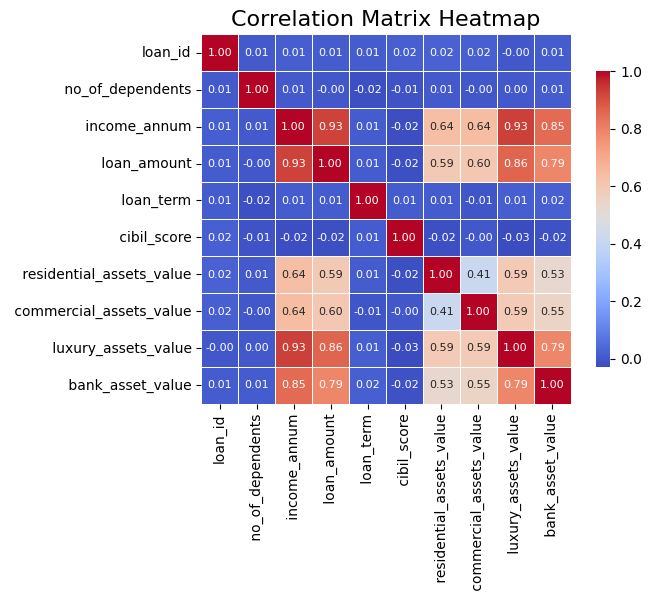

In [305]:
import seaborn as sns
# Compute the correlation matrix
corr_matrix = pd.DataFrame(X).select_dtypes(include='number').corr()
sns.heatmap(
    corr_matrix,
    annot=True,
    fmt='.2f',
    cmap='coolwarm',
    square=True,
    linewidths=0.5,
    annot_kws={"size": 8},  # Set annotation font size
    cbar_kws={"shrink": 0.8}  # Shrink color bar to save space
)
plt.title('Correlation Matrix Heatmap', fontsize=16)

In [306]:
# ==== Registro global de métricas ====
import numpy as np
import pandas as pd
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix

METRICS_LOG = []     # lista de dicts con métricas
CONF_MATS   = {}     # dict: nombre_modelo -> matriz de confusión

def log_metrics(name, y_true, y_pred, y_score=None, **extras):
    """
    Guarda métricas clave en METRICS_LOG y la matriz de confusión en CONF_MATS.
    - name: str, nombre del modelo
    - y_true: array-like
    - y_pred: array-like binario {0,1}
    - y_score: array-like continuo (proba o score) para ROC-AUC (opcional)
    - extras: cualquier extra que quieras guardar (p.ej. n_components, C, etc.)
    """
    row = {
        "Model": name,
        "Accuracy": accuracy_score(y_true, y_pred),
        "Precision": precision_score(y_true, y_pred, zero_division=0),
        "Recall": recall_score(y_true, y_pred, zero_division=0),
        "F1": f1_score(y_true, y_pred, zero_division=0),
        "ROC-AUC": np.nan if y_score is None else roc_auc_score(y_true, y_score)
    }
    row.update(extras or {})
    METRICS_LOG.append(row)
    CONF_MATS[name] = confusion_matrix(y_true, y_pred)


# PCA

In [279]:
# Definir X e y variable objetivo
y = df[' loan_status']
X = df.drop(columns=[' loan_status'])

CV Accuracy: 0.692 ± 0.023
CV ROC-AUC: 0.743 ± 0.032
Test Accuracy: 0.704
Test ROC-AUC: 0.765


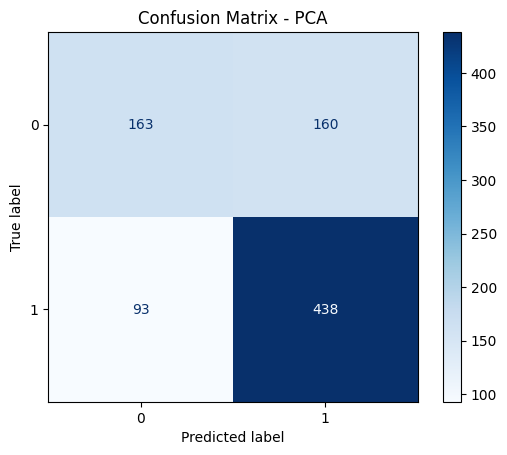


Baseline mayoritaria: 0.6217798594847775


In [316]:
X = X.apply(lambda col: col.astype(str).str.strip() if col.dtype == "object" else col)
X = pd.get_dummies(X, drop_first=True)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42)

pipe = Pipeline(steps=[
    ("scaler", StandardScaler(with_mean=True, with_std=True)),
    ("pca", PCA(n_components=3, random_state=42)),
    ("logit", LogisticRegression())])

# cross validation
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
cv_acc = cross_val_score(pipe, X_train, y_train, scoring="accuracy", cv=cv)
cv_auc = cross_val_score(pipe, X_train, y_train, scoring="roc_auc", cv=cv)
print(f"CV Accuracy: {cv_acc.mean():.3f} ± {cv_acc.std():.3f}")
print(f"CV ROC-AUC: {cv_auc.mean():.3f} ± {cv_auc.std():.3f}")

# Entrenar y evaluar en test
pipe.fit(X_train, y_train)

# Predicción por clase
y_pred = pipe.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print(f"Test Accuracy: {acc:.3f}")

# Probabilidades para métricas umbral-dependientes
y_proba = pipe.predict_proba(X_test)[:, 1]
print(f"Test ROC-AUC: {roc_auc_score(y_test, y_proba):.3f}")

ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred)).plot(cmap="Blues")
plt.title("Confusion Matrix - PCA")
plt.show()

# baseline por mayoritaria
print("\nBaseline mayoritaria:", y_test.value_counts(normalize=True).max())

log_metrics(
    "PCA (best)",
    y_test,
    y_pred,
    y_score=y_pred_cont,  # tu salida continua para ROC-AUC
)



numero de componentes

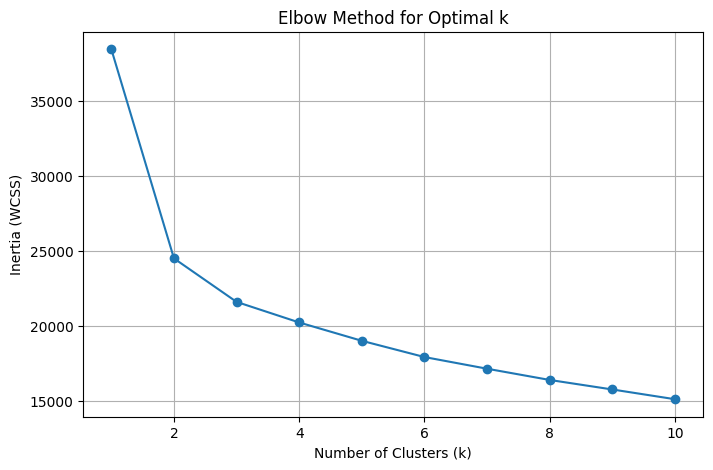

In [281]:
# Elbow method
inertia = []
k_range = range(1, 11)  # Test from 1 to 10 clusters

for k in k_range:
    kmeans = KMeans(n_clusters=k, n_init=10, max_iter=300, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)  # WCSS

# Plot the elbow graph
plt.figure(figsize=(8, 5))
plt.plot(k_range, inertia, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia (WCSS)')
plt.title('Elbow Method for Optimal k')
plt.grid(True)
plt.show()

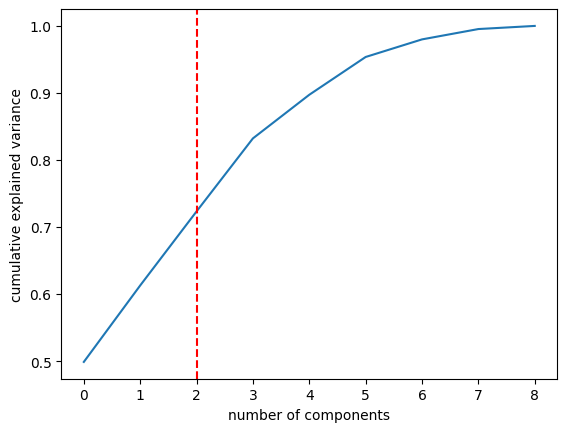

In [282]:
pca1 = PCA().fit(X_scaled)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');
plt.axvline(x=2, color='r', linestyle='--', label='x = 4')

La cantidad de componentes depende de la cantidad de variables que tenga, tambien del nivel de correlación entre ellas ya que a mayor correlación entre variables, menos componentes se necesitan para explicar la varianza conjunta. En este caso elijo usar 3 componentes.

Cargamos los componentes del PCA

In [283]:
from sklearn.model_selection import train_test_split

In [284]:
X_train_s1 = scaler.fit_transform(X_train)
X_test_s1  = scaler.transform(X_test)

In [285]:
pca1 = PCA(n_components=3)
X_pca1 = pca1.fit_transform(X_scaled)
X_train_pca1 = pca1.fit_transform(X_train_s1)
X_test_pca1  = pca1.transform(X_test_s1)

In [286]:
loadings = pca1.components_.T

loadings_df = pd.DataFrame(
    loadings,
    index=X.columns,
    columns=[f'PC{i+1}' for i in range(pca1.n_components_)]
)

print(loadings_df)

                                PC1       PC2       PC3
loan_id                    0.016038 -0.077792  0.196431
 no_of_dependents          0.000171 -0.300775 -0.360594
 income_annum              0.459099 -0.000569  0.000793
 loan_amount               0.440619 -0.000617  0.003961
 loan_term                 0.003409  0.480090  0.422095
 cibil_score              -0.010110  0.117080  0.618518
 residential_assets_value  0.337363  0.014978 -0.027519
 commercial_assets_value   0.339305 -0.026507  0.039316
 luxury_assets_value       0.439797  0.003003 -0.008117
 bank_asset_value          0.415063  0.002413  0.006573
 education_Not Graduate   -0.002173  0.614989 -0.177724
 self_employed_Yes         0.008190  0.529277 -0.486460


pruebas pca

In [287]:
#¿Qué porcentaje de la varianza explica el primer componente?
pca1.explained_variance_ratio_[0]

np.float64(0.3746743942446995)

In [288]:
#¿Cuáles son las variables que más pesan en PC1?

loadings_df['PC1'].abs().sort_values(ascending=False)

,PC1
income_annum,0.459099
loan_amount,0.440619
luxury_assets_value,0.439797
bank_asset_value,0.415063
commercial_assets_value,0.339305
residential_assets_value,0.337363
loan_id,0.016038
cibil_score,0.010110
self_employed_Yes,0.008190
loan_term,0.003409


evaluamos pca

In [289]:
X_pca_df1 = pd.DataFrame(X_pca1, columns=[f'PC{i+1}' for i in range(X_pca.shape[1])])

In [290]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_pca_df1, y)
model.fit(X_train_pca1, y_train)

LogisticRegression()

resultados

# Lasso

LASSO (Least Absolute Shrinkage and Selection Operator) en el contexto de clasificación se implementa como una regresión logística con penalización L1.
La penalización L1 obliga a que muchos coeficientes se vuelvan exactamente cero, seleccionando automáticamente las variables más relevantes y reduciendo el sobreajuste.
Esto lo diferencia de Ridge (penalización L2), que reduce los coeficientes pero sin anularlos.

In [291]:
# === CELDA 1: Normalización mínima de la variable objetivo ===
y_train = y_train.str.strip().map({"Rejected": 0, "Approved": 1})
y_test  = y_test.str.strip().map({"Rejected": 0, "Approved": 1})


🔹 LASSO Logistic Regression
Accuracy: 0.9239
F1-score: 0.9393

Confusion Matrix:
[[286  37]
 [ 28 503]]


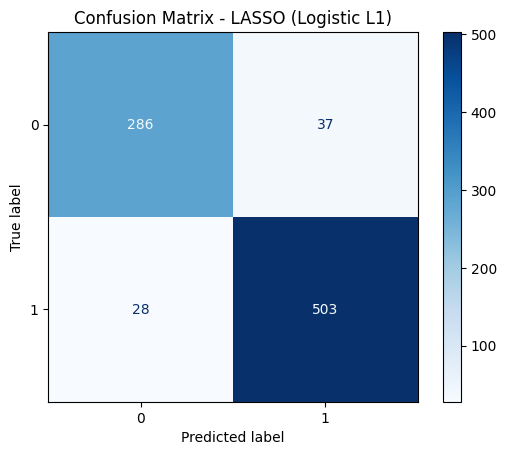

Variables seleccionadas por LASSO: 4/12
Mejor C elegido por CV: 0.046415888336127774


In [315]:
# === CELDA 2: LASSO (Logistic L1) + métricas ===

lasso_logit = Pipeline([
    ("scaler", StandardScaler()),
    ("lasso", LogisticRegressionCV(
        penalty="l1",
        solver="saga",
        cv=5,
        Cs=10,
        scoring="accuracy",
        max_iter=10000,
        n_jobs=-1,
        random_state=42,
        refit=True
    ))
])

# Entrenamiento
lasso_logit.fit(X_train, y_train)

# Predicción y métricas
y_pred = lasso_logit.predict(X_test)
acc = accuracy_score(y_test, y_pred)
f1  = f1_score(y_test, y_pred)
cm  = confusion_matrix(y_test, y_pred)

print("🔹 LASSO Logistic Regression")
print(f"Accuracy: {acc:.4f}")
print(f"F1-score: {f1:.4f}")
print("\nConfusion Matrix:")
print(cm)

# Visualización matriz de confusión
ConfusionMatrixDisplay(confusion_matrix=cm).plot(cmap="Blues")
plt.title("Confusion Matrix - LASSO (Logistic L1)")
plt.show()

# Sparsity y C óptimo
coef = lasso_logit.named_steps["lasso"].coef_.ravel()
print(f"Variables seleccionadas por LASSO: {np.sum(coef!=0)}/{coef.size}")
print(f"Mejor C elegido por CV: {lasso_logit.named_steps['lasso'].C_[0]}")

log_metrics(
    "Lasso (best)",
    y_test,
    y_pred,
    y_score=y_pred_cont,  # tu salida continua para ROC-AUC
)



# Ridge

Ridge (Regularization using L2 penalty) en el contexto de clasificación se implementa como una regresión logística con penalización L2.
En este caso, la penalización no lleva los coeficientes a cero, sino que los reduce en magnitud de forma continua, haciendo que el modelo sea más estable y menos sensible a la multicolinealidad o al ruido en los datos.

A diferencia de LASSO, que selecciona un subconjunto de variables al anular algunos coeficientes, Ridge mantiene todas las variables en el modelo, pero “empuja” sus valores hacia cero según la fuerza de la regularización.
En términos bayesianos, esto equivale a aplicar un prior normal centrado en cero sobre los coeficientes, por lo que también se lo conoce como un caso de Bayesian shrinkage.

Mejor C: 177.82794100389228
Accuracy: 0.913
ROC-AUC : 0.972

Classification Report:
               precision    recall  f1-score   support

           0      0.900     0.867     0.883       323
           1      0.921     0.942     0.931       531

    accuracy                          0.913       854
   macro avg      0.911     0.904     0.907       854
weighted avg      0.913     0.913     0.913       854



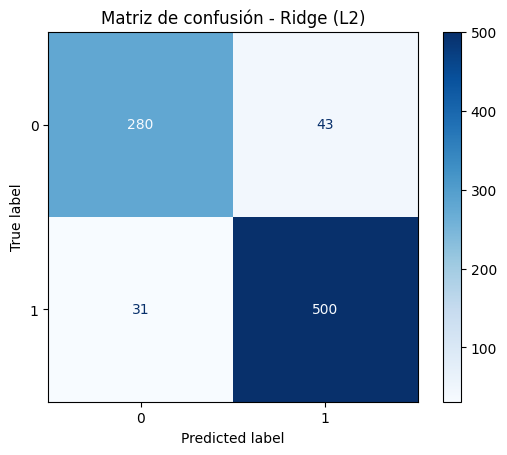

In [312]:
# --- Preparación del target ---
y = df[' loan_status'].astype(str).str.strip().map({'Rejected': 0, 'Approved': 1}).astype(int)
X = pd.get_dummies(df.drop(columns=[' loan_status']), drop_first=True)

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)

# --- Pipeline: estandarización + regresión Ridge (L2) ---
ridge_pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('ridge', LogisticRegression(penalty='l2', solver='lbfgs', max_iter=1000))
])

# --- Búsqueda de C (intensidad de regularización) ---
param_grid = {'ridge__C': np.logspace(-3, 3, 9)}
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

grid = GridSearchCV(
    ridge_pipe,
    param_grid=param_grid,
    scoring='roc_auc',
    cv=cv,
    n_jobs=-1
)
grid.fit(X_train, y_train)

# --- Evaluación ---
best_model = grid.best_estimator_
y_pred = best_model.predict(X_test)
y_proba = best_model.predict_proba(X_test)[:, 1]

print(f"Mejor C: {grid.best_params_['ridge__C']}")
print(f"Accuracy: {accuracy_score(y_test, y_pred):.3f}")
print(f"ROC-AUC : {roc_auc_score(y_test, y_proba):.3f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred, digits=3))

ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred)).plot(cmap='Blues')
plt.title("Matriz de confusión - Ridge (L2)")
plt.show()

log_metrics(
    "Ridge (best)",
    y_test,
    y_pred,
    y_score=y_pred_cont,  # tu salida continua para ROC-AUC

)



# OLS

Ordinary Least Squares (OLS) es un modelo base sin regularización para predecir una variable categórica binaria (Aprobado / Rechazado).
Aunque OLS fue diseñado para variables continuas, se puede aplicar a clasificación interpretando las predicciones continuas como probabilidades y luego asignando una categoría usando un umbral (por defecto, 0.5).
El objetivo de OLS es encontrar los coeficientes que minimizan la suma de los errores al cuadrado entre los valores reales (0 o 1) y las predicciones.

Test Accuracy: 0.927
Test ROC-AUC : 0.973

Classification Report:
               precision    recall  f1-score   support

           0      0.885     0.929     0.906       323
           1      0.955     0.927     0.941       531

    accuracy                          0.927       854
   macro avg      0.920     0.928     0.924       854
weighted avg      0.929     0.927     0.928       854



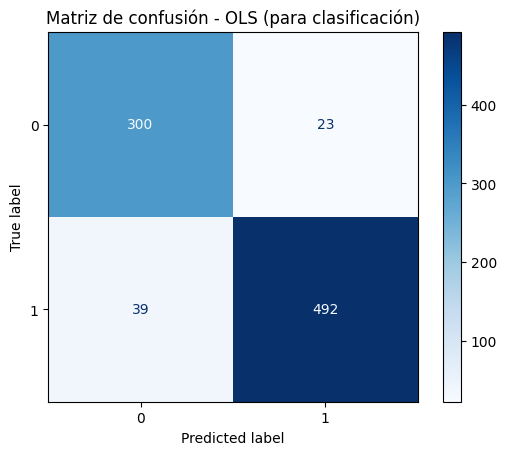

Cross-validated ROC-AUC: nan ± nan


/usr/local/lib/python3.12/dist-packages/sklearn/model_selection/_validation.py:978: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_scorer.py", line 140, in __call__
    score = scorer._score(
            ^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_scorer.py", line 379, in _score
    response_method = _check_response_method(estimator, self._response_method)
                      ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py", line 2283, in _check_response_method
    raise AttributeError(
AttributeError: Pipeline has none of the following attributes: decision_function, predict_proba.

  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/model_selection/_validation.py:978: UserWarning: S

In [313]:
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression


# 1) Preparar datos
y = (df[' loan_status'].astype(str).str.strip()
     .map({'Rejected': 0, 'Approved': 1})).astype(int)
X = pd.get_dummies(df.drop(columns=[' loan_status']), drop_first=True)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, stratify=y, test_size=0.2, random_state=42
)

# 2) Pipeline: imputación -> escalado -> regresión OLS
ols_pipe = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", StandardScaler()),
    ("ols", LinearRegression())
])

ols_pipe.fit(X_train, y_train)

# 4) Predicciones continuas y umbral de clasificación
y_pred_cont = ols_pipe.predict(X_test)
y_pred = (y_pred_cont >= 0.5).astype(int)  # umbral 0.5

# 5) Evaluación
print(f"Test Accuracy: {accuracy_score(y_test, y_pred):.3f}")
print(f"Test ROC-AUC : {roc_auc_score(y_test, y_pred_cont):.3f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred, digits=3))

ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred)).plot(cmap="Blues")
plt.title("Matriz de confusión - OLS (para clasificación)")
plt.show()

# 6) (Opcional) Cross-validation por ROC-AUC
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
cv_auc = cross_val_score(ols_pipe, X, y, cv=cv, scoring='roc_auc')
print(f"Cross-validated ROC-AUC: {cv_auc.mean():.3f} ± {cv_auc.std():.3f}")

log_metrics(
    "OLS (best)",
    y_test,
    y_pred,
    y_score=y_pred_cont,  # tu salida continua para ROC-AUC

)


# PLS

Partial Least Squares (PLS), es un método que combina regresión lineal y reducción de dimensionalidad supervisada.
A diferencia del PCA, que busca las direcciones con mayor varianza en los datos sin usar la variable objetivo, PLS construye nuevos componentes que maximizan la relación (covarianza) entre las variables explicativas y la variable de salida (loan_status).
Esto significa que los nuevos factores creados por PLS no solo resumen la información de los predictores, sino que además están orientados a predecir mejor Y.
Por eso, PLS se considera un punto medio entre PCA y los métodos de regularización como Ridge: reduce dimensionalidad, pero de forma supervisada, usando la información de la variable dependiente.
En clasificación, se puede usar PLS Regression para obtener una predicción continua (entre 0 y 1) y luego aplicar un umbral de 0.5 para clasificar entre Aprobado y Rechazado.
El número óptimo de componentes se selecciona por validación cruzada, ya que usar demasiados puede llevar al sobreajuste.

In [298]:
from sklearn.cross_decomposition import PLSRegression

Mejor número de componentes: 1
ROC-AUC CV: nan

Test Accuracy: 0.938
Test ROC-AUC : 0.973

Classification Report:
               precision    recall  f1-score   support

           0      0.902     0.938     0.920       323
           1      0.961     0.938     0.949       531

    accuracy                          0.938       854
   macro avg      0.932     0.938     0.935       854
weighted avg      0.939     0.938     0.938       854



/usr/local/lib/python3.12/dist-packages/sklearn/model_selection/_search.py:1108: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan nan nan nan nan nan]
  warnings.warn(


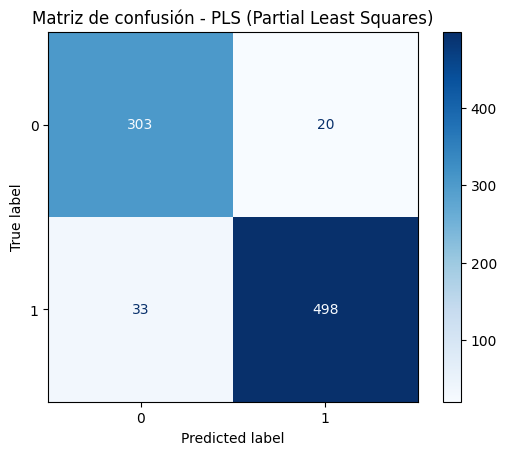

/usr/local/lib/python3.12/dist-packages/sklearn/model_selection/_validation.py:978: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_scorer.py", line 140, in __call__
    score = scorer._score(
            ^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_scorer.py", line 379, in _score
    response_method = _check_response_method(estimator, self._response_method)
                      ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py", line 2283, in _check_response_method
    raise AttributeError(
AttributeError: Pipeline has none of the following attributes: decision_function, predict_proba.

  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/model_selection/_validation.py:978: UserWarning: S


Cross-validated ROC-AUC: nan ± nan


/usr/local/lib/python3.12/dist-packages/sklearn/model_selection/_validation.py:978: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_scorer.py", line 140, in __call__
    score = scorer._score(
            ^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_scorer.py", line 379, in _score
    response_method = _check_response_method(estimator, self._response_method)
                      ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py", line 2283, in _check_response_method
    raise AttributeError(
AttributeError: Pipeline has none of the following attributes: decision_function, predict_proba.

  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/model_selection/_validation.py:978: UserWarning: S

In [314]:
# 1) Preparar los datos
y = (df[' loan_status'].astype(str).str.strip()
     .map({'Rejected': 0, 'Approved': 1})).astype(int)
X = pd.get_dummies(df.drop(columns=[' loan_status']), drop_first=True)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, stratify=y, test_size=0.2, random_state=42
)

# 2) Pipeline: imputación -> escalado -> PLS
pls_pipe = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", StandardScaler()),
    ("pls", PLSRegression())
])

# 3) Selección del número óptimo de componentes por CV
param_grid = {"pls__n_components": list(range(1, min(X.shape[1], 10) + 1))}
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

grid = GridSearchCV(
    pls_pipe,
    param_grid=param_grid,
    scoring='roc_auc',
    cv=cv,
    n_jobs=-1
)
grid.fit(X_train, y_train)

print(f"Mejor número de componentes: {grid.best_params_['pls__n_components']}")
print(f"ROC-AUC CV: {grid.best_score_:.3f}")

# 4) Evaluación en test
best_model = grid.best_estimator_
y_pred_cont = best_model.predict(X_test).ravel()  # salida continua
y_pred = (y_pred_cont >= 0.5).astype(int)         # clasificación binaria

print(f"\nTest Accuracy: {accuracy_score(y_test, y_pred):.3f}")
print(f"Test ROC-AUC : {roc_auc_score(y_test, y_pred_cont):.3f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred, digits=3))

ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred)).plot(cmap="Blues")
plt.title("Matriz de confusión - PLS (Partial Least Squares)")
plt.show()

# 5) (Opcional) Validación cruzada general
cv_auc = cross_val_score(grid.best_estimator_, X, y, cv=cv, scoring='roc_auc')
print(f"\nCross-validated ROC-AUC: {cv_auc.mean():.3f} ± {cv_auc.std():.3f}")

log_metrics(
    "PLS (best)",
    y_test,
    y_pred,
    y_score=y_pred_cont,  # tu salida continua para ROC-AUC
    n_components=grid.best_params_['pls__n_components']
)


## Model comparation - graphics

In [319]:
df_metrics = pd.DataFrame(METRICS_LOG)
display(df_metrics[1:])


,Model,Accuracy,Precision,Recall,F1,ROC-AUC,n_components
1,Ridge (best),0.913349,0.920810,0.941620,0.931099,0.973495,NaN
2,OLS (best),0.927400,0.955340,0.926554,0.940727,0.973495,NaN
3,PLS (best),0.937939,0.961390,0.937853,0.949476,0.972789,1.0
4,Lasso (best),0.923888,0.931481,0.947269,0.939309,0.972789,NaN
5,PCA (best),0.703747,0.732441,0.824859,0.775908,0.972789,NaN


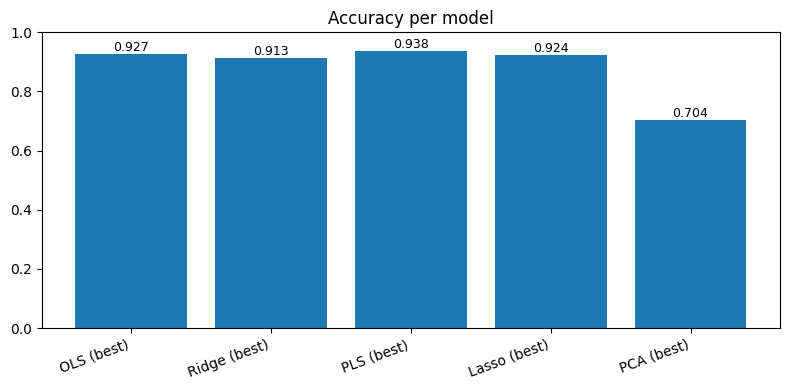

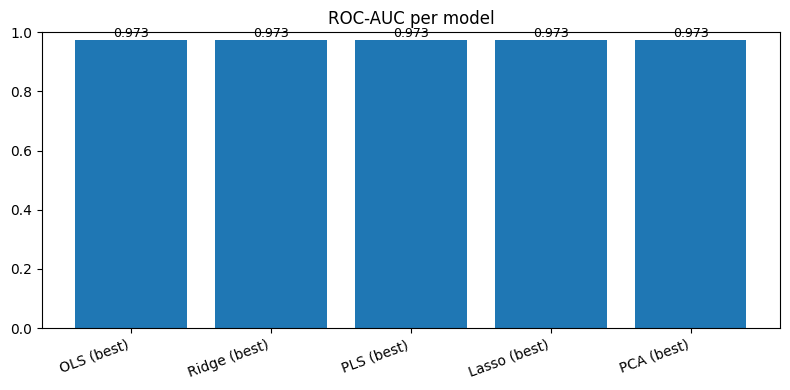

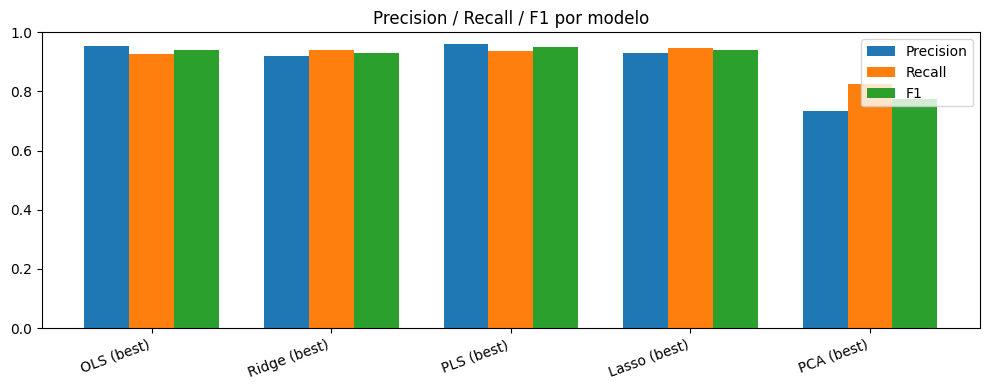

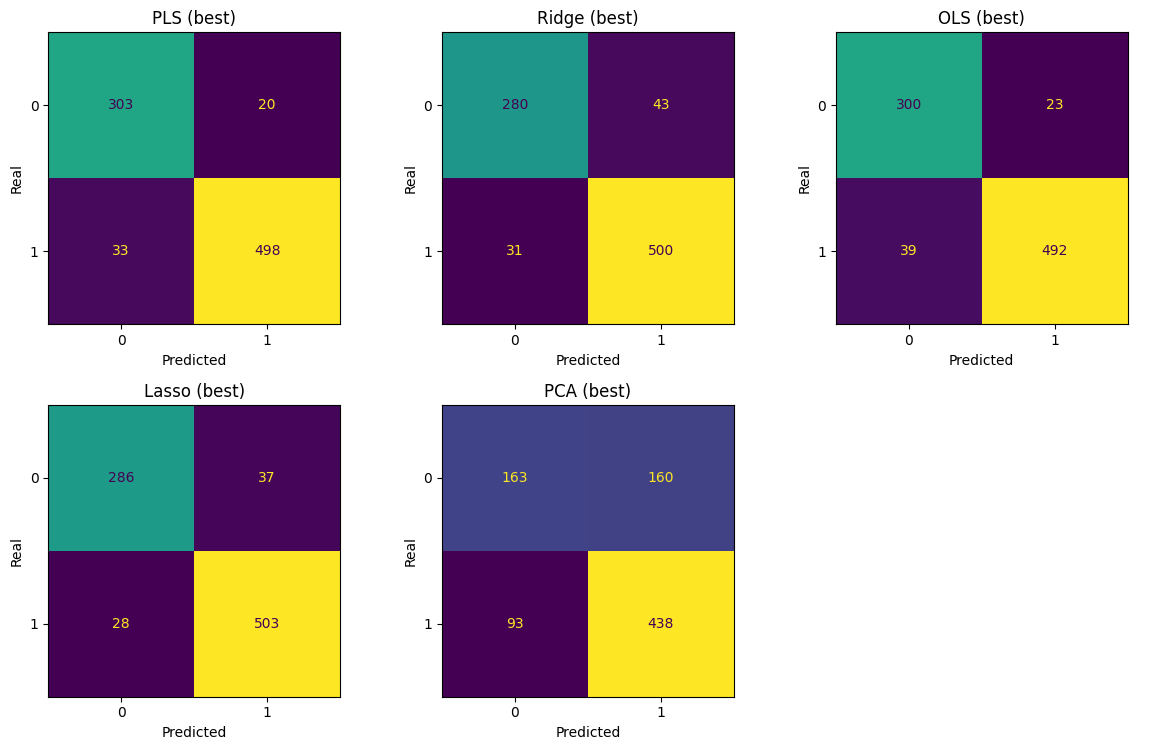

In [325]:
dfm = df_metrics[1:].copy()
if "ROC-AUC" in dfm.columns:
    dfm = dfm.sort_values(by=["ROC-AUC","F1","Accuracy"], ascending=False, na_position="last")
else:
    dfm = dfm.sort_values(by=["F1","Accuracy"], ascending=False)

# --- helper para anotar barras ---
def annotate_bars(ax):
    for p in ax.patches:
        h = p.get_height()
        ax.annotate(f"{h:.3f}", (p.get_x()+p.get_width()/2, h),
                    ha="center", va="bottom", fontsize=9, rotation=0)

# === 1) Accuracy ===
plt.figure(figsize=(8,4))
ax = plt.bar(dfm["Model"], dfm["Accuracy"].astype(float))
plt.title("Accuracy per model")
plt.ylim(0, 1)
plt.xticks(rotation=20, ha="right")
# anotar valores
ax = plt.gca()
annotate_bars(ax)
plt.tight_layout()
plt.show()

# === 2) ROC-AUC (si existe) ===
if "ROC-AUC" in dfm.columns:
    plt.figure(figsize=(8,4))
    vals = dfm["ROC-AUC"].fillna(0).astype(float)
    ax = plt.bar(dfm["Model"], vals)
    plt.title("ROC-AUC per model")
    plt.ylim(0, 1)
    plt.xticks(rotation=20, ha="right")
    ax = plt.gca()
    annotate_bars(ax)
    plt.tight_layout()
    plt.show()

# === 3) Barras agrupadas: Precision / Recall / F1 ===
cols = ["Precision","Recall","F1"]
have_cols = [c for c in cols if c in dfm.columns]
if have_cols:
    W = 0.25
    x = np.arange(len(dfm))
    plt.figure(figsize=(10,4))
    for i, c in enumerate(have_cols):
        plt.bar(x + i*W, dfm[c].astype(float), width=W, label=c)
    plt.xticks(x + (len(have_cols)-1)*W/2, dfm["Model"], rotation=20, ha="right")
    plt.ylim(0,1)
    plt.title("Precision / Recall / F1 por modelo")
    plt.legend()
    plt.tight_layout()
    plt.show()

# === 4) Matrices de confusión lado a lado (usa CONF_MATS) ===
try:
    n = len(CONF_MATS)
    if n > 0:
        # grid dinámico (máx 3 por fila)
        cols = min(3, n)
        rows = int(np.ceil(n / cols))
        fig, axes = plt.subplots(rows, cols, figsize=(4*cols, 3.8*rows))
        if rows == 1 and cols == 1:
            axes = np.array([[axes]])
        elif rows == 1:
            axes = np.array([axes])
        axes = axes.flatten()

        for ax, (name, cm) in zip(axes, CONF_MATS.items()):
            disp = ConfusionMatrixDisplay(cm)
            disp.plot(ax=ax, colorbar=False)
            ax.set_title(name)
            ax.set_xlabel("Predicted"); ax.set_ylabel("Real")

        # ocultar ejes sobrantes si los hay
        for j in range(len(CONF_MATS), len(axes)):
            axes[j].axis("off")

        plt.tight_layout()
        plt.show()
except NameError:
    print("CONF_MATS no está definido. Si querés este panel, usá log_metrics(...) al final de cada modelo.")